In [1]:
#libraries 
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules 

C:\Users\hirom\AppData\Roaming\Python\Python38\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hirom\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\hirom\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Context 

Instacart is an american company that provides a grocery delivery and pick-up
service via a website or mobile app in the United States and Canada.

### Outcomes 

You should aim to provide an overview of Instacart's business as complete as
possible. Jane is particularly interested in the topics below:

- What are the main types of consumer behavior in the business?
- Which types of products should have an extended amount of product offerings?
- Which types of products can be seen as substitutes?
- Which items are complementary?

In [2]:
dep = pd.read_csv(r'C:/Users/hirom/Documents/GitHub/Business-Case-/Business Case 03 - Apr/departments.csv')
op = pd.read_csv(r'C:/Users/hirom/Documents/GitHub/Business-Case-/Business Case 03 - Apr/order_products.csv')
ord = pd.read_csv(r'C:/Users/hirom/Documents/GitHub/Business-Case-/Business Case 03 - Apr/orders.csv')
prod = pd.read_csv(r'C:/Users/hirom/Documents/GitHub/Business-Case-/Business Case 03 - Apr/products.csv')

In [3]:
dep.head(4)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce


In [4]:
op.head(4)

,order_id,product_id,add_to_cart_order,reordered
0,10,24,1,1
1,10,83,2,1
2,10,16,3,0
3,10,24,4,1


In [5]:
ord.head(4)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0


In [6]:
prod.head(4)

,product_id,department_id,product_name
0,61,19,cookies cakes
1,104,13,spices seasonings
2,94,7,tea
3,38,1,frozen meals


In [7]:
ord.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2425083,49125,1,2,18,NaN
1,1944304,162867,1,3,17,NaN
2,1201011,147243,14,0,16,3.0
3,1906860,195275,81,1,11,3.0
4,2766469,58222,3,6,11,6.0


In [8]:
def preprocessing(db):
    print(db.isna().sum())
    print(db.duplicated().sum())
    print(pd.DataFrame(db.describe(include="all")))

In [9]:
preprocessing(prod)

product_id       0
department_id    0
product_name     0
dtype: int64
0
        product_id  department_id product_name
count   134.000000     134.000000          134
unique         NaN            NaN          134
top            NaN            NaN      laundry
freq           NaN            NaN            1
mean     67.500000      11.373134          NaN
std      38.826537       5.726435          NaN
min       1.000000       1.000000          NaN
25%      34.250000       7.000000          NaN
50%      67.500000      12.000000          NaN
75%     100.750000      16.000000          NaN
max     134.000000      21.000000          NaN


Queremos entender o comportamento dos produtos: 
- Frequencia de compra dos produtos
- criar a regra de associação

In [10]:
## Merge tables of op and prod  

data = pd.merge(op,prod, how='inner', on='product_id')
data

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name
0,10,24,1,1,4,fresh fruits
1,10,24,4,1,4,fresh fruits
2,10,24,7,1,4,fresh fruits
3,28,24,4,1,4,fresh fruits
4,28,24,6,1,4,fresh fruits
...,...,...,...,...,...,...
2019496,2979128,132,1,0,11,beauty
2019497,2991218,132,19,0,11,beauty
2019498,3067425,132,1,1,11,beauty
2019499,3142948,132,1,1,11,beauty


Usamos a tabela **data** para identificar quantos pedidos foram feitos de cada produto.

A tabela data gera a correlação entre os pedidos, quantidade de pedidos e os produtos que foram pedidos depois da primeira.

In [11]:
## Understand the frequency of each product 


data['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [12]:
order_prod = pd.pivot_table(data, values='product_id', index=['order_id'], columns=['product_name'], aggfunc = lambda x: 1 if len(x)>0 else 0).fillna(0)
order_prod.head(5)

product_name,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_id,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
order_prod['yogurt'].sum()

52735.0

In [14]:
## Understanding the behavior of shopping 
data1 = pd.merge(data,ord, how='inner', on='order_id')
data1

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,10,24,1,1,4,fresh fruits,135442,4,6,8,8.0
1,10,24,4,1,4,fresh fruits,135442,4,6,8,8.0
2,10,24,7,1,4,fresh fruits,135442,4,6,8,8.0
3,10,83,2,1,4,fresh vegetables,135442,4,6,8,8.0
4,10,83,5,1,4,fresh vegetables,135442,4,6,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...
2019496,2868389,134,1,0,5,specialty wines champagnes,88794,3,3,15,13.0
2019497,2983818,134,1,0,5,specialty wines champagnes,74254,8,4,16,9.0
2019498,2994082,134,1,1,5,specialty wines champagnes,1705,15,0,15,0.0
2019499,3054899,134,1,1,5,specialty wines champagnes,17880,4,4,16,5.0


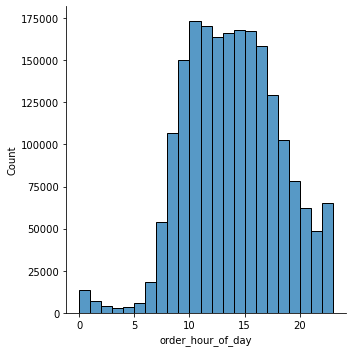

In [15]:
import seaborn as sns
#what is the time that has the most orders 
sns.displot(data1, x='order_hour_of_day', binwidth=1)

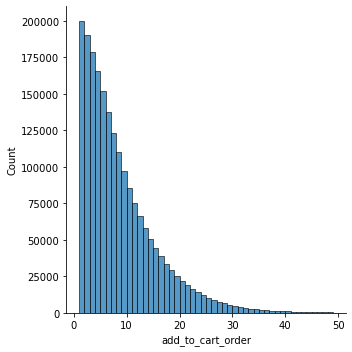

In [16]:
#how many items each customer buy?
sns.displot(data1[data1['add_to_cart_order'] < 50], x='add_to_cart_order',binwidth = 1)

In [17]:
### TOP 10 PRODUCTS MOST SOLD
pd.pivot_table(data1, values='add_to_cart_order', index=['product_name'], aggfunc='count').sort_values('add_to_cart_order', ascending=False).head(10)

,add_to_cart_order
product_name,
fresh fruits,226039
fresh vegetables,212611
packaged vegetables fruits,109596
yogurt,90751
packaged cheese,61502
milk,55150
water seltzer sparkling water,52564
chips pretzels,45306
soy lactosefree,39389


In [18]:
### TOP 10 PRODUCTS LESS SOLD
pd.pivot_table(data1, values='add_to_cart_order', index=['product_name'], aggfunc='count').sort_values('add_to_cart_order', ascending=True).head(10)

,add_to_cart_order
product_name,
frozen juice,279
beauty,387
baby accessories,504
baby bath body care,515
kitchen supplies,561
eye ear care,598
specialty wines champagnes,614
shave needs,646
skin care,654


In [22]:
##correlating with the department
data2 = pd.merge(data1,dep, how='inner', on='department_id')
data2

,order_id,product_id,add_to_cart_order,reordered,department_id,product_name,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,department
0,10,24,1,1,4,fresh fruits,135442,4,6,8,8.0,produce
1,10,24,4,1,4,fresh fruits,135442,4,6,8,8.0,produce
2,10,24,7,1,4,fresh fruits,135442,4,6,8,8.0,produce
3,10,83,2,1,4,fresh vegetables,135442,4,6,8,8.0,produce
4,10,83,5,1,4,fresh vegetables,135442,4,6,8,8.0,produce
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,2765986,134,1,1,5,specialty wines champagnes,75305,15,2,16,0.0,alcohol
2019497,2868389,134,1,0,5,specialty wines champagnes,88794,3,3,15,13.0,alcohol
2019498,2983818,134,1,0,5,specialty wines champagnes,74254,8,4,16,9.0,alcohol
2019499,2994082,134,1,1,5,specialty wines champagnes,1705,15,0,15,0.0,alcohol


In [34]:
pd.pivot_table(data2, values='add_to_cart_order', index=['department'], aggfunc='count').sort_values('add_to_cart_order', ascending=True)

,add_to_cart_order
department,
bulk,2133
other,2240
missing,4749
pets,6013
alcohol,9439
international,16738
babies,25940
personal care,28134
meat seafood,44271


In [54]:
#identify which product in each department 

data2[data2['department'] == 'snacks']['product_name'].value_counts()
    
    

chips pretzels            45306
energy granola bars       28639
crackers                  28574
nuts seeds dried fruit    19026
candy chocolate           18735
cookies cakes             14745
fruit vegetable snacks    10931
popcorn jerky             10415
trail mix snack mix        2238
mint gum                   1377
ice cream toppings          706
Name: product_name, dtype: int64

## Association rule

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/#frequent-itemsets-via-apriori-algorithm

https://pbpython.com/market-basket-analysis.html

In [20]:
import matplotlib.pyplot as plt 
from apyori import apriori

In [59]:
#create a pvt table with the correlation of orders and products 

ar1 = pd.pivot_table(data2, index='order_id', columns='product_name', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
ar1

add_to_cart_order                               \
product_name air fresheners candles asian foods baby accessories   
order_id                                                           
10                              0.0         0.0              0.0   
11                              0.0         0.0              0.0   
28                              0.0         0.0              0.0   
38                              0.0         0.0              0.0   
56                              0.0         0.0              0.0   
...                             ...         ...              ...   
3420991                         0.0         0.0              0.0   
3421019                         0.0         0.0              0.0   
3421027                         0.0         0.0              0.0   
3421074                         0.0         0.0              0.0   
3421080                         0.0         0.0              0.0   

                                                                    \
product_name baby bath body care baby food formula bakery desserts   
order_id                                                             
10                           0.0               1.0             0.0   
11                           0.0               0.0             0.0   
28                           0.0               0.0             0.0   
38                           0.0               0.0             0.0   
56                           0.0               0.0             0.0   
...                          ...               ...             ...   
3420991                      0.0               0.0             0.0   
3421019                      0.0               0.0             0.0   
3421027                      0.0               0.0             0.0   
3421074                      0.0               0.0             0.0   
3421080                      0.0               0.0             0.0   

                                                                            \
product_name baking ingredients baking supplies decor beauty beers coolers   
order_id                                                                     
10                          0.0                   0.0    0.0           0.0   
11                          0.0                   0.0    0.0           0.0   
28                          0.0                   0.0    0.0           0.0   
38                          0.0                   0.0    0.0           0.0   
56                          0.0                   0.0    0.0           0.0   
...                         ...                   ...    ...           ...   
3420991                     0.0                   0.0    0.0           0.0   
3421019                     0.0                   0.0    0.0           0.0   
3421027                     0.0                   0.0    0.0           0.0   
3421074                     0.0                   0.0    0.0           0.0   
3421080                     0.0                   0.0    0.0           0.0   

              ... user_id                                                   \
product_name  ... spreads  tea tofu meat alternatives tortillas flat bread   
order_id      ...                                                            
10            ...     0.0  0.0                    0.0                  0.0   
11            ...     0.0  0.0                    0.0                  0.0   
28            ...     1.0  0.0                    0.0                  0.0   
38            ...     0.0  0.0                    0.0                  0.0   
56            ...     0.0  0.0                    0.0                  0.0   
...           ...     ...  ...                    ...                  ...   
3420991       ...     0.0  0.0                    0.0                  0.0   
3421019       ...     0.0  0.0                    0.0                  0.0   
3421027       ...     0.0  0.0                    0.0                  0.0   
3421074       ...     0.0  0.0                    1.0  

In [63]:
teste = apriori(ar1, min_support=0.6, use_colnames=True)
teste

<generator object apriori at 0x00000161B10A5660>